### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from datetime import datetime

### Working Directories

In [2]:
# Get the current working directory
os.getcwd()

'C:\\Users\\Kalmerrick\\Documents\\JC Treasury Analysis\\Python\\Useful Code'

In [3]:
# Get a list of files in the directory
os.listdir()

['.ipynb_checkpoints',
 'Binning practice',
 'bokeh tutorial.ipynb',
 'Code examples.ipynb',
 'Data',
 'decorator  test.ipynb',
 'decorators.py',
 'defs.py',
 'Display linear best fit line.ipynb',
 'Exploratory Data Analysis.ipynb',
 'Function Test V0.1.ipynb',
 'Function Test V0.2.ipynb',
 'Generate line of best fit.ipynb',
 'IF statements research.ipynb',
 'Linear Regression with Python.ipynb',
 'Melt Function.ipynb',
 'multiprocessing — Process-based parallelism.ipynb',
 'Nested dictionary.ipynb',
 'OOP .ipynb',
 'Police.csv',
 'Random noise .ipynb',
 'Regular Expressions',
 'Results',
 'Sample',
 'test.csv',
 'Theading.ipynb',
 'WAPM data iteration.ipynb',
 '__pycache__']

In [4]:
# Create a path variable that is used to access files in the Data folder
PATH = 'Data/'

In [5]:
# List files in the data folder
os.listdir(PATH)

['All Sample v4 csioImp.csv',
 'AllPrisoners_190106.csv',
 'Orders Test.xlsx',
 'paroleStatsSample.xlsx',
 'penaltyCountDaily.csv',
 'testData.csv']

In [6]:
# Function that displays all the columns of a data frame
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

### Importing data

In [7]:
# Import an excel file and parse dates to assist with timeseries analysis
df = pd.read_excel(f'{PATH}paroleStatsSample.xlsx', parse_dates = ['DecisionDate'])

In [8]:
# Import an excel file and import a particular excel sheet
xl = pd.ExcelFile(f'{PATH}Orders Test.xlsx')

In [9]:
# Get sheet names
xl.sheet_names

['Sheet1', 'Sheet2', 'Sheet3', 'Test1']

In [10]:
dfA = xl.parse("Test1", parse_dates=['CensusDate'])

In [11]:
dfA.head()

,CensusDate,DistinctPersons,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,2005-12-09,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-12-10,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-12-11,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005-12-12,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005-12-13,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Import a csv file
# New file for AL, needs to be wrangled
dfB = pd.read_csv(f'{PATH}penaltyCountDaily.csv', low_memory = False)
# Old data
dfC = pd.read_csv(f'{PATH}All Sample v4 csioImp.csv', low_memory = False)

In [13]:
dfC.head()

,ParticipantGroupID,GroupID,GroupHeadCase,CaseID,GroupCaseCount,GroupPrisonCaseCount,GroupCaseStart,GroupCaseEnd,GroupDaysToEnd,ParticipantID,...,MinSumTrl,HearingsComToTrial,MinMeanComTrl,MinSumComTrl,HearingsComToFinal,MinMeanComFnl,MinSumComFnl,HearingsTrlToFinal,MinMeanTrlFnl,MinSumTrlFnl
0,3681CC0F-2F38-470D-879A-40FE3E7FF7F2-4,4,NaN,2,30,12.0,23/08/2012,21/09/2017,1856,3681CC0F-2F38-470D-879A-40FE3E7FF7F2,...,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3681CC0F-2F38-470D-879A-40FE3E7FF7F2-4,4,NaN,4,30,12.0,23/08/2012,21/09/2017,1856,3681CC0F-2F38-470D-879A-40FE3E7FF7F2,...,230.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3681CC0F-2F38-470D-879A-40FE3E7FF7F2-4,4,NaN,11,30,12.0,23/08/2012,21/09/2017,1856,3681CC0F-2F38-470D-879A-40FE3E7FF7F2,...,239.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3681CC0F-2F38-470D-879A-40FE3E7FF7F2-4,4,NaN,5,30,12.0,23/08/2012,21/09/2017,1856,3681CC0F-2F38-470D-879A-40FE3E7FF7F2,...,306.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3918FC46-E3DE-4479-9219-619DA2FC9AAC-6,6,YES,1,8,1.0,20/05/2015,21/09/2017,856,3918FC46-E3DE-4479-9219-619DA2FC9AAC,...,1002.0,17.0,53.529412,910.0,20.0,73.3,1466.0,20.0,73.3,1466.0


In [14]:
print("Dataframe -  rows:",dfB.shape[0]," columns:", df.shape[1])

Dataframe -  rows: 1145  columns: 13


### Basic displays

In [15]:
df.shape
df.describe()
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
DecisionFY        100 non-null object
DecisionDate      100 non-null datetime64[ns]
TOMS_ID           100 non-null object
Ethnicity         100 non-null object
MatterType        100 non-null object
ReviewType        100 non-null object
ReviewReason      100 non-null object
ReleaseType       100 non-null object
ReviewSequence    100 non-null int64
EED               91 non-null datetime64[ns]
Outcome           100 non-null object
ReasonSequence    100 non-null int64
Reason            100 non-null object
dtypes: datetime64[ns](2), int64(2), object(9)
memory usage: 10.2+ KB


### Missing data

In [16]:
# Use sum to get a count of the number of nulls not count
df['EED'].isnull().sum()

9

In [17]:
# get the number of missing data points per column
missing_values_count =  df.isnull().sum()
# look at the # of missing points in the first ten columns
display_all(missing_values_count.sort_values(ascending=False))

EED               9
Reason            0
ReasonSequence    0
Outcome           0
ReviewSequence    0
ReleaseType       0
ReviewReason      0
ReviewType        0
MatterType        0
Ethnicity         0
TOMS_ID           0
DecisionDate      0
DecisionFY        0
dtype: int64

In [18]:
# How many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

0.6923076923076923

### Drop columns / rows

In [19]:
# Drop a particular column
dfA.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6',
        'Unnamed: 7', 'Unnamed: 8'], axis=1, inplace=True)

In [20]:
# remove all columns with at least one missing value
#train.dropna(axis=1, inplace = True)

In [21]:
# Use axis =0, to delete rows with missing values
#df.dropna(axis=0, inplace = True)

In [22]:
# Drop na's for a specific subset, e.g column 'XXX' 
#df.dropna(subset =['XXX'], inplace = True)

### Set Index

In [23]:
# Set the date as an index for timeseries plotting
dfA.set_index('CensusDate', inplace=True)

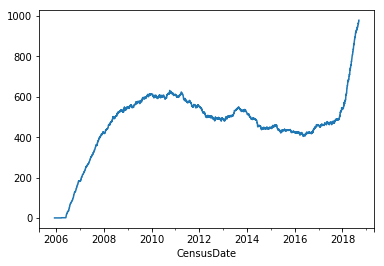

In [24]:
### Basic Plot
dfA['DistinctPersons'].plot()

### Sorting a DataFrame

In [27]:
# Can sort a dataset by many columns and sort ascending or descending for each column
#df.sort_values('DecisionDate', ascending = False)
#df.sort_values(['DecisionDate','TOMS_ID'], ascending = [True, False])

### Filtering Data

In [28]:
# You can filter on the dataset by using a mask
# The example below
mask = (df['Outcome'] == 'Denied')
df[mask].head()

,DecisionFY,DecisionDate,TOMS_ID,Ethnicity,MatterType,ReviewType,ReviewReason,ReleaseType,ReviewSequence,EED,Outcome,ReasonSequence,Reason
0,2010/11,2010-07-01,B1073836,ABORIGINAL,Parole,Parole,Parole Application,Discretionary,1,2010-07-31,Denied,1,Serious and violent nature of current offences.
1,2010/11,2010-07-01,B1073836,ABORIGINAL,Parole,Parole,Parole Application,Discretionary,1,2010-07-31,Denied,2,"Extensive criminal history including violence,..."
2,2010/11,2010-07-01,B1073836,ABORIGINAL,Parole,Parole,Parole Application,Discretionary,1,2010-07-31,Denied,3,Entrenched history of poly-substance abuse whi...
3,2010/11,2010-07-01,B1073836,ABORIGINAL,Parole,Parole,Parole Application,Discretionary,1,2010-07-31,Denied,4,Unaddressed offending behaviour (substance abu...
4,2010/11,2010-07-01,B1073836,ABORIGINAL,Parole,Parole,Parole Application,Discretionary,1,2010-07-31,Denied,5,Parole in 2002 and 2003 breached by re-offending.


### Data conversions

In [29]:
# To get a list of the DataFrame data types
df.dtypes

DecisionFY                object
DecisionDate      datetime64[ns]
TOMS_ID                   object
Ethnicity                 object
MatterType                object
ReviewType                object
ReviewReason              object
ReleaseType               object
ReviewSequence             int64
EED               datetime64[ns]
Outcome                   object
ReasonSequence             int64
Reason                    object
dtype: object

In [30]:
# Convert the 'Reason' column to a String
# I coverted this to a String as some of the values were causing errors due to being considered floats
df['Reason'] = df['Reason'].astype(str, inplace = True)

### Create a new column through concatenation

In [31]:
# Create a new column called 'DecisionDateString' which is 'DecisionDate' concatenated to the Toms_ID
df['DecisionDateString'] = df['DecisionDate'].astype(str) + df['TOMS_ID']

### Counts

In [32]:
# This will give the counts for individual columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
DecisionFY            100 non-null object
DecisionDate          100 non-null datetime64[ns]
TOMS_ID               100 non-null object
Ethnicity             100 non-null object
MatterType            100 non-null object
ReviewType            100 non-null object
ReviewReason          100 non-null object
ReleaseType           100 non-null object
ReviewSequence        100 non-null int64
EED                   91 non-null datetime64[ns]
Outcome               100 non-null object
ReasonSequence        100 non-null int64
Reason                100 non-null object
DecisionDateString    100 non-null object
dtypes: datetime64[ns](2), int64(2), object(10)
memory usage: 11.0+ KB


In [33]:
# This will give the count for a specific column
df['TOMS_ID'].count()

100

In [34]:
# This give the value count for each TOMS_ID
df['TOMS_ID'].value_counts().tail()

B1367371    3
I1989386    3
E0980752    3
J1386468    1
D2038251    1
Name: TOMS_ID, dtype: int64

In [35]:
# Use 'normalize=True' to express as a percentage
df['TOMS_ID'].value_counts(normalize=True).head()

I2120066    0.10
E1408378    0.09
E1055794    0.09
B1354006    0.08
E0871348    0.07
Name: TOMS_ID, dtype: float64

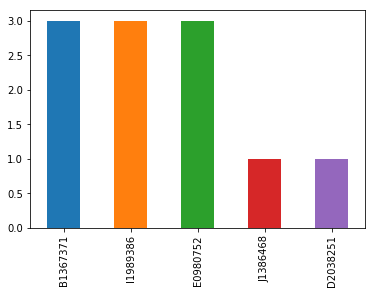

In [36]:
# Quick count visualisation
df['TOMS_ID'].value_counts().tail(5).plot(kind='bar')

In [37]:
display_all(dfC.head())

,ParticipantGroupID,GroupID,GroupHeadCase,CaseID,GroupCaseCount,GroupPrisonCaseCount,GroupCaseStart,GroupCaseEnd,GroupDaysToEnd,ParticipantID,SID,SLK,DOB,Gender,Indigeneity,ChargeID,OTSubSection,OTSection,LegislationName,OffenceType,ANZSOCCode,ANZSOCOffenceType,nationalOffenceIndex,IsSimple,LowerCourtCaseID,LC_Jurisdiction,HigherCourtCaseID,HC_Jurisdiction,FirstActualHearingDate,FirstHearingCustody,FirstHearingMinutes,LodgementDate,LodgementJurisdiction,MOFCode,FinalisationDate,DaysToFinalise,FirstHearingPlea,PreCommittalPlea,PreCommittalPleaChange,PreCommittalPleaChangeDate,PreCommittalPleaDelay,HadCommittalHearing,CommittalDate,CommittalDelay,CommittalPlea,CommittalPleaChange,IsCommitted,CommittalReason,CommittedTo,CommittalHearingMinutes,PreTrialPlea,PreTrialPleaDate,PreTrialPleaChange,PreTrialPleaDelay,TrialFirstDate,TrialStart,TrialEnd,TrialDays,TrialDelay,TrialStatus,TrialJurisdiction,TrialPlea,TrialOutcome,TimeToTrial,TrialMinutes,PostTrialPleaDate,PostTrialPlea,PostTrialPleaChange,PostTrialPleaDelay,Withdrawn,WithdrawDate,WithdrawnAt,WithdrawDelay,SentenceDate,SentenceStart,SentenceDelay,SentenceHearingMinutes,SentenceJurisdiction,SentenceType,IsSentencedCustodial,FirstInCase,IsHeadSentence,SentenceDays,AdjustedSentenceDays,SentenceExpiryDate,DischargeDate,ReleaseType,FromTOMS,GroupUseSentence,GroupSentenceFrom,GroupSentenceNotRemand,GroupSentenceEnd,GroupMaxSentence,GroupSentenceDays,GroupPropServed,GroupPropServedAdjusted,GroupAdjustedMaxSentenceDays,GroupAdjustedSentenceDays,GroupRemandDays,GroupUseRemand,GroupRemandProp,IsRemanded,RemandReceptions,PrisonReceptions,StillInPrison,IsEligibleForParole,SuspensionDays,SuspensionExpiryDate,Fines,Costs,OtherFinancialPenalties,HasFinancialPenalty,SentenceIsParoleBreach,GroupParoleCount,GroupHadParoleHearing,GroupFirstParoleHearing,GroupParoleLength,GroupAvgParoleDelay,GroupParoleBreach,GroupAvgParoleBreachDelay,GroupAvgParoleBreachStay,GroupParoleEligibleDuration,IsBreached,BreachCount,FirstBreachDate,FirstBreachDelay,BreachSentenceDate,LastBreachDelay,BreachSentenceType,BreachSentenceDays,BreachSentenceExpiryDate,BreachIsEligibleForParole,BreachSuspensionDays,BreachSuspensionExpiryDate,BreachFines,BreachCosts,BreachOtherFinancialPenalties,BreachSentenceStart,BreachSentenceNotRemanded,BreachDischargeDate,BreachReleaseType,BreachImprisonmentInclude,LC_MOFCode,LC_MOFDescription,LC_FinalisationDate,HC_MOFCode,HC_MOFDescription,HC_FinalisationDate,AdjustedCaseHearingsToFinaliseMC,AdjustedCaseHearingsToFinaliseDC,AdjustedCaseHearingsToFinaliseSC,UniqueHearingAdjustmentMC,UniqueHearingAdjustmentDC,UniqueHearingAdjustmentSC,GroupCommittals,GroupUniqueCommittals,UniqueCommittalAdjustment,GroupPTrialsMC,GroupNTrialsMC,GroupPTrialMCMinMean,GroupNTrialMCMinMean,GroupPTrialMCMinSum,GroupNTrialMCMinSum,GroupPTrialMCDayMean,GroupNTrialMCDayMean,GroupPTrialMCDaySum,GroupNTrialMCDaySum,GroupPTrialsDC,GroupNTrialsDC,GroupPTrialDCMinMean,GroupNTrialDCMinMean,GroupPTrialDCMinSum,GroupNTrialDCMinSum,GroupPTrialDCDayMean,GroupNTrialDCDayMean,GroupPTrialDCDaySum,GroupNTrialDCDaySum,GroupPTrialsSC,GroupNTrialsSC,GroupPTrialSCMinMean,GroupNTrialSCMinMean,GroupPTrialSCMinSum,GroupNTrialSCMinSum,GroupPTrialSCDayMean,GroupNTrialSCDayMean,GroupPTrialSCDaySum,GroupNTrialSCDaySum,GroupUniquePTrialsMC,GroupUniqueNTrialsMC,UniquePTrialAdjustmentMC,UniqueNTrialAdjustmentMC,GroupUniquePTrialMCMinMean,GroupUniqueNTrialMCMinMean,GroupUniquePTrialMCMinSum,GroupUniqueNTrialMCMinSum,GroupUniquePTrialMCDayMean,GroupUniqueNTrialMCDayMean,GroupUniquePTrialMCDaySum,GroupUniqueNTrialMCDaySum,GroupUniquePTrialsDC,GroupUniqueNTrialsDC,UniquePTrialAdjustmentDC,UniqueNTrialAdjustmentDC,GroupUniquePTrialDCMinMean,GroupUniqueNTrialDCMinMean,GroupUniquePTrialDCMinSum,GroupUniqueNTrialDCMinSum,GroupUniquePTrialDCDayMean,GroupUniqueNTrialDCDayMean,GroupUniquePTrialDCDaySum,GroupUniqueNTrialDCDaySum,GroupUniquePTrialsSC,GroupUniqueNTrialsSC,UniquePTrialAdjustmentSC,UniqueNTrialAdjustmentSC,GroupUniquePTrialSCMinMean,GroupUniqu

In [38]:
# Get counts of particular column conditions
dfC[dfC['SentenceType'] == 'Conditional Suspended Imprisonment Order']['Gender'].value_counts()
# For percentages
#dfC[dfC['SentenceType'] == 'Conditional Suspended Imprisonment Order']['Gender'].value_counts(normalize = True)

Male      54
Female    15
Name: Gender, dtype: int64

In [39]:
# The number of uniques in a column
dfC['ParticipantID'][dfC['SentenceType'] =='Conditional Suspended Imprisonment Order'].nunique()

64

In [40]:
# Print the unique Id's
df['TOMS_ID'].unique()

array(['B1073836', 'B1354006', 'B1367371', 'B1946404', 'D1859709',
       'E0871348', 'E0921298', 'E0980752', 'E1055794', 'E1408378',
       'E2059672', 'G1875921', 'I0910223', 'I1652633', 'I1989386',
       'I2120066', 'J1386468', 'D2038251'], dtype=object)

### Check for duplicates

In [41]:
# Check for duplicates
# There are 5 duplicated Ids
dfC['ParticipantID'][dfC['SentenceType'] =='Conditional Suspended Imprisonment Order'][dfC['ParticipantID'][dfC['SentenceType'] =='Conditional Suspended Imprisonment Order'].duplicated()].count()

5

In [42]:
# Check for duplicates and list the uniques
#[df['TOMS_ID'].duplicated()
#df['TOMS_ID'][df['TOMS_ID'].duplicated() == True]
# Note: False : Mark all duplicates as ``True``.
df['TOMS_ID'][df['TOMS_ID'].duplicated(keep = False) == True].unique()

array(['B1073836', 'B1354006', 'B1367371', 'B1946404', 'D1859709',
       'E0871348', 'E0921298', 'E0980752', 'E1055794', 'E1408378',
       'E2059672', 'G1875921', 'I0910223', 'I1652633', 'I1989386',
       'I2120066'], dtype=object)

(array([ 43., 364., 133., 198.,  83.,  24.,  19., 109.,  18.,  72.]),
 array([  1. ,  16.4,  31.8,  47.2,  62.6,  78. ,  93.4, 108.8, 124.2,
        139.6, 155. ]),
 <a list of 10 Patch objects>)

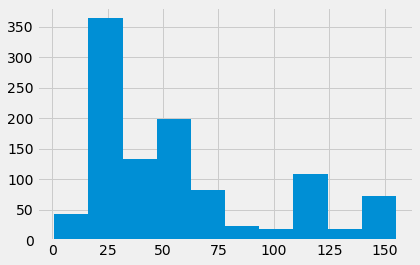

In [43]:
# Basic plot
plt.style.use('fivethirtyeight')
plt.hist(dfC['nationalOffenceIndex'])

### Groupby

In [44]:
# Group data on particular columns
dfC.groupby('SentenceType').Gender.value_counts()
# Groupby expressed as a percentage
#dfC.groupby('SentenceType').Gender.value_counts(normalize=True)

SentenceType                              Gender
Conditional Suspended Imprisonment Order  Male       54
                                          Female     15
Imprisonment                              Male      869
                                          Female    125
Name: Gender, dtype: int64

In [45]:
# The 'agg' function below is used to aggregate text
df2 = df.groupby(['DecisionDate', 'TOMS_ID']).agg({'Reason':lambda x:'| '.join(x)})

In [46]:
# To select certain columns after a groupby E.g like TOMSID add another square bracket for the aggregation
# Note this is an example 
#dfXX.groupby(['FinYearReceived'])['TOMSID'].count()

In [47]:
display_all(df2['Reason'])

DecisionDate  TOMS_ID 
2010-07-01    B1073836    Serious and violent nature of current offences...
              B1354006    Serious and violent nature of current offence ...
              B1367371    Repetitive nature of driving without a licence...
              B1946404    Risk is sufficiently low to justify Release on...
              D1859709    Serious and violent nature of current offences...
              E0871348    Serious nature of current offences of driving ...
              E0921298    Serious and violent nature of current offences...
              E0980752    Serious nature of current offence.| Significan...
              E1055794    Current offences include offence of driving wi...
              E1408378    Serious and violent nature of current offences...
              E2059672    The risk to the safety of the community is red...
              G1875921    Serious and sexual nature of current offences ...
              I0910223    Serous and repetitive nature of aggrava

### Aggregate Function

#### Create a Test DataFrame

In [48]:
df3 = pd.DataFrame([[1, 2, 3],
                   [4, 5 ,6],
                   [7, 8, 9],
                   [np.nan, np.nan, np.nan]
                   ], columns = ['A', 'B', 'C'])

In [49]:
df3

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,6.0
2,7.0,8.0,9.0
3,NaN,NaN,NaN


In [50]:
# Aggregate numerically
df3.agg(['sum'])

,A,B,C
sum,12.0,15.0,18.0


In [51]:
df4 = pd.DataFrame([[1, 'A1', 'B1', 'C1'],
                   [1, 'A2', 'B2', 'C2'],
                   [2, 'D1', 'E1', 'F1'],
                   [3, 'G1', 'H1', 'I1'],
                   [3, 'G2', 'H2', 'I2'],
                   ],
                  columns = ['Name','Col1', 'Col2', 'Col3'])

In [52]:
df4

,Name,Col1,Col2,Col3
0,1,A1,B1,C1
1,1,A2,B2,C2
2,2,D1,E1,F1
3,3,G1,H1,I1
4,3,G2,H2,I2


In [53]:
# Aggregate text
df4.groupby('Name').agg({'Col1':lambda x:'|'.join(x)})

,Col1
Name,
1,A1|A2
2,D1
3,G1|G2


### Transpose data

In [54]:
d1 = {'col1': [1, 2,3], 'col2': [3, 4, 5]};d1

{'col1': [1, 2, 3], 'col2': [3, 4, 5]}

In [55]:
display_all(d1)

{'col1': [1, 2, 3], 'col2': [3, 4, 5]}

In [56]:
type(d1)

dict

In [57]:
df1 = pd.DataFrame(data=d1)

In [58]:
type(df1)

pandas.core.frame.DataFrame

In [59]:
df1

,col1,col2
0,1,3
1,2,4
2,3,5


In [60]:
df1_transposed = df1.T;df1_transposed

,0,1,2
col1,1,2,3
col2,3,4,5


In [61]:
df1_transposed.dtypes

0    int64
1    int64
2    int64
dtype: object

In [62]:
d2 = {'name': ['Alice', 'Bob'],
      'score': [9.5, 8],
      'employed': [False, True],
      'kids': [0, 0]}

In [63]:
d2

{'employed': [False, True],
 'kids': [0, 0],
 'name': ['Alice', 'Bob'],
 'score': [9.5, 8]}

In [64]:
df2 = pd.DataFrame(data=d2)

In [65]:
df2

,employed,kids,name,score
0,False,0,Alice,9.5
1,True,0,Bob,8.0


In [66]:
df2_transposed = df2.T # or df2.transpose();
df2_transposed

,0,1
employed,False,True
kids,0,0
name,Alice,Bob
score,9.5,8


In [67]:
df2_transposed.dtypes

0    object
1    object
dtype: object

## Massage DataFrame (Melt Function)

In [68]:
dfB.head()

,Gender,ATSI,AgeGroup,JurisdictionTypeCode,SentenceType,1/01/2012,2/01/2012,3/01/2012,4/01/2012,5/01/2012,...,21/09/2018,22/09/2018,23/09/2018,24/09/2018,25/09/2018,26/09/2018,27/09/2018,28/09/2018,29/09/2018,30/09/2018
0,Female,Indigenous,<18,CC,Community Based Order,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,Indigenous,<18,CC,Fines,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Female,Indigenous,<18,CC,Good Behaviour Bond,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Female,Indigenous,<18,CC,Imprisonment,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Female,Indigenous,<18,CC,Intensive Youth Supervision Order,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
dfB.shape

(1145, 2470)

In [70]:
# Use the Melt function to massage DataFrame function where on or more columns
# are identifier variables ('id_vars'), while all other columns, considered measured
# variables ('value_vars')
dfB2 = pd.melt(dfB, id_vars=["Gender", "ATSI", "AgeGroup", "JurisdictionTypeCode", "SentenceType"],
             var_name="Date", value_name="Counts")

In [71]:
#Hierarchical Indexing
#PDA Chap 8
data = pd.Series(np.random.randn(9),
                index=[['a', 'a','a','b','b','c','c','d','d'],
                [1, 2, 3, 1, 3, 1, 2, 2, 3]])

In [72]:
#loc

In [73]:
data.loc[:,1]

a   -0.176657
b   -1.443132
c    0.621962
dtype: float64

In [74]:
data.index

MultiIndex(levels=[['a', 'b', 'c', 'd'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 2, 0, 2, 0, 1, 1, 2]])

In [75]:
data['b']

1   -1.443132
3   -0.234263
dtype: float64

## Data Selection (Slicing)

In [76]:
dfB2.head()

,Gender,ATSI,AgeGroup,JurisdictionTypeCode,SentenceType,Date,Counts
0,Female,Indigenous,<18,CC,Community Based Order,1/01/2012,NaN
1,Female,Indigenous,<18,CC,Fines,1/01/2012,NaN
2,Female,Indigenous,<18,CC,Good Behaviour Bond,1/01/2012,NaN
3,Female,Indigenous,<18,CC,Imprisonment,1/01/2012,NaN
4,Female,Indigenous,<18,CC,Intensive Youth Supervision Order,1/01/2012,NaN


In [77]:
# Selecting slices of a DataFrame
# Use loc to select a rows by using the index
# Example select the first and fifth row
dfB2.loc[[0, 4]]

,Gender,ATSI,AgeGroup,JurisdictionTypeCode,SentenceType,Date,Counts
0,Female,Indigenous,<18,CC,Community Based Order,1/01/2012,NaN
4,Female,Indigenous,<18,CC,Intensive Youth Supervision Order,1/01/2012,NaN


In [78]:
# You can also use iloc and use the Integer location
# Example select the third row up to but not including the fifth
dfB2.iloc[2:4]

,Gender,ATSI,AgeGroup,JurisdictionTypeCode,SentenceType,Date,Counts
2,Female,Indigenous,<18,CC,Good Behaviour Bond,1/01/2012,NaN
3,Female,Indigenous,<18,CC,Imprisonment,1/01/2012,NaN


In [79]:
# Select the rows where the 'SentenceType' is 'Imprisonment' and get a count of populated column values
dfB2.loc[dfB2['SentenceType'] == 'Conditional Suspended Imprisonment'].count()

Gender                  231710
ATSI                    207060
AgeGroup                234175
JurisdictionTypeCode    234175
SentenceType            234175
Date                    234175
Counts                    2657
dtype: int64

In [80]:
# Select all the data in the DataFrame where the Sentence Type is 'Fines'
dfB2[dfB2['SentenceType'] == 'Fines'].head()

,Gender,ATSI,AgeGroup,JurisdictionTypeCode,SentenceType,Date,Counts
1,Female,Indigenous,<18,CC,Fines,1/01/2012,NaN
9,Female,Indigenous,<18,MC,Fines,1/01/2012,NaN
14,Female,Indigenous,18-20,CC,Fines,1/01/2012,NaN
23,Female,Indigenous,18-20,DC,Fines,1/01/2012,NaN
30,Female,Indigenous,18-20,MC,Fines,1/01/2012,NaN


In [81]:
# Create a boolean variable in a series where 'True' indicates if the Sentence Type is Fines
mask1 = dfB2['SentenceType'] == 'Fines'

In [82]:
# Note this is the same as df2[df2['SentenceType'] == 'Fines']
dfB2[mask1].head()

,Gender,ATSI,AgeGroup,JurisdictionTypeCode,SentenceType,Date,Counts
1,Female,Indigenous,<18,CC,Fines,1/01/2012,NaN
9,Female,Indigenous,<18,MC,Fines,1/01/2012,NaN
14,Female,Indigenous,18-20,CC,Fines,1/01/2012,NaN
23,Female,Indigenous,18-20,DC,Fines,1/01/2012,NaN
30,Female,Indigenous,18-20,MC,Fines,1/01/2012,NaN


In [83]:
# This is another way of getting the same result
dfB2.loc[dfB2['SentenceType'] == 'Fines'].head()

,Gender,ATSI,AgeGroup,JurisdictionTypeCode,SentenceType,Date,Counts
1,Female,Indigenous,<18,CC,Fines,1/01/2012,NaN
9,Female,Indigenous,<18,MC,Fines,1/01/2012,NaN
14,Female,Indigenous,18-20,CC,Fines,1/01/2012,NaN
23,Female,Indigenous,18-20,DC,Fines,1/01/2012,NaN
30,Female,Indigenous,18-20,MC,Fines,1/01/2012,NaN


In [84]:
# I want to filter on Sentence Type 'Conditional Suspended Imprisonment' and 'Fines'
dfB2['SentenceType'] == 'Conditional Suspended Imprisonment'
# This brings back all the filtered CSIOs
dfB2[dfB2['SentenceType'] == 'Conditional Suspended Imprisonment']
# The .loc function appears to need a boolean condition
dfB2.loc[dfB2['SentenceType'] == 'Conditional Suspended Imprisonment'].head()

,Gender,ATSI,AgeGroup,JurisdictionTypeCode,SentenceType,Date,Counts
13,Female,Indigenous,18-20,CC,Conditional Suspended Imprisonment,1/01/2012,NaN
22,Female,Indigenous,18-20,DC,Conditional Suspended Imprisonment,1/01/2012,NaN
29,Female,Indigenous,18-20,MC,Conditional Suspended Imprisonment,1/01/2012,NaN
37,Female,Indigenous,18-20,SC,Conditional Suspended Imprisonment,1/01/2012,NaN
46,Female,Indigenous,21-30,DC,Conditional Suspended Imprisonment,1/01/2012,NaN


In [85]:
dfB2.loc[dfB2.SentenceType == 'Imprisonment']
mask2 = (dfB2.SentenceType == 'Conditional Suspended Imprisonment')
mask3 = mask1 | mask2;mask3
dfB2[mask3]
dfB2.loc[mask3].head()

,Gender,ATSI,AgeGroup,JurisdictionTypeCode,SentenceType,Date,Counts
1,Female,Indigenous,<18,CC,Fines,1/01/2012,NaN
9,Female,Indigenous,<18,MC,Fines,1/01/2012,NaN
13,Female,Indigenous,18-20,CC,Conditional Suspended Imprisonment,1/01/2012,NaN
14,Female,Indigenous,18-20,CC,Fines,1/01/2012,NaN
22,Female,Indigenous,18-20,DC,Conditional Suspended Imprisonment,1/01/2012,NaN


In [86]:
# This filters the dataset where SentenceType is CSIO or Fines
dfB2.loc[(dfB2['SentenceType'] == 'Conditional Suspended Imprisonment') | (dfB2['SentenceType'] == 'Fines')].head()

,Gender,ATSI,AgeGroup,JurisdictionTypeCode,SentenceType,Date,Counts
1,Female,Indigenous,<18,CC,Fines,1/01/2012,NaN
9,Female,Indigenous,<18,MC,Fines,1/01/2012,NaN
13,Female,Indigenous,18-20,CC,Conditional Suspended Imprisonment,1/01/2012,NaN
14,Female,Indigenous,18-20,CC,Fines,1/01/2012,NaN
22,Female,Indigenous,18-20,DC,Conditional Suspended Imprisonment,1/01/2012,NaN


In [87]:
mask4 = (dfB2['SentenceType'] == 'Fines') & (dfB2['Gender'] == 'Female')

In [88]:
dfB2.loc[mask4].head()

,Gender,ATSI,AgeGroup,JurisdictionTypeCode,SentenceType,Date,Counts
1,Female,Indigenous,<18,CC,Fines,1/01/2012,NaN
9,Female,Indigenous,<18,MC,Fines,1/01/2012,NaN
14,Female,Indigenous,18-20,CC,Fines,1/01/2012,NaN
23,Female,Indigenous,18-20,DC,Fines,1/01/2012,NaN
30,Female,Indigenous,18-20,MC,Fines,1/01/2012,NaN


In [89]:
dfB2.loc[(dfB2['SentenceType'] == 'Fines') & (dfB2['Gender'] == 'Female')].head()

,Gender,ATSI,AgeGroup,JurisdictionTypeCode,SentenceType,Date,Counts
1,Female,Indigenous,<18,CC,Fines,1/01/2012,NaN
9,Female,Indigenous,<18,MC,Fines,1/01/2012,NaN
14,Female,Indigenous,18-20,CC,Fines,1/01/2012,NaN
23,Female,Indigenous,18-20,DC,Fines,1/01/2012,NaN
30,Female,Indigenous,18-20,MC,Fines,1/01/2012,NaN


In [90]:
mask5 = (dfB2['SentenceType'] == 'Conditional Suspended Imprisonment') | (dfB2['SentenceType'] == 'Fines')

In [91]:
dfB2[mask5]
dfB2.loc[mask5]
dfB2.loc[(dfB2['SentenceType'] == 'Conditional Suspended Imprisonment') | (dfB2['SentenceType'] == 'Fines')].head()

,Gender,ATSI,AgeGroup,JurisdictionTypeCode,SentenceType,Date,Counts
1,Female,Indigenous,<18,CC,Fines,1/01/2012,NaN
9,Female,Indigenous,<18,MC,Fines,1/01/2012,NaN
13,Female,Indigenous,18-20,CC,Conditional Suspended Imprisonment,1/01/2012,NaN
14,Female,Indigenous,18-20,CC,Fines,1/01/2012,NaN
22,Female,Indigenous,18-20,DC,Conditional Suspended Imprisonment,1/01/2012,NaN


In [92]:
dfB2.head(10)

,Gender,ATSI,AgeGroup,JurisdictionTypeCode,SentenceType,Date,Counts
0,Female,Indigenous,<18,CC,Community Based Order,1/01/2012,NaN
1,Female,Indigenous,<18,CC,Fines,1/01/2012,NaN
2,Female,Indigenous,<18,CC,Good Behaviour Bond,1/01/2012,NaN
3,Female,Indigenous,<18,CC,Imprisonment,1/01/2012,NaN
4,Female,Indigenous,<18,CC,Intensive Youth Supervision Order,1/01/2012,NaN
5,Female,Indigenous,<18,CC,Other,1/01/2012,NaN
6,Female,Indigenous,<18,CC,Youth Community Based Order,1/01/2012,NaN
7,Female,Indigenous,<18,CC,Youth Conditional Release Order,1/01/2012,NaN
8,Female,Indigenous,<18,CC,Youth Good Behaviour Bond,1/01/2012,NaN
9,Female,Indigenous,<18,MC,Fines,1/01/2012,NaN


In [93]:
dfB2.sort_values(['SentenceType'], ascending = True).head()

,Gender,ATSI,AgeGroup,JurisdictionTypeCode,SentenceType,Date,Counts
0,Female,Indigenous,<18,CC,Community Based Order,1/01/2012,NaN
224299,Male,Unknown,51-60,DC,Community Based Order,14/07/2012,NaN
2434627,Female,Non-Indigenous,>60,MC,Community Based Order,27/10/2017,NaN
1305085,Male,Non-Indigenous,>60,MC,Community Based Order,13/02/2015,NaN
2028793,Male,Unknown,31-40,MC,Community Based Order,6/11/2016,NaN


In [94]:
# code below works
dfB2['SentenceType'] == 'Conditional Suspended Imprisonment' 
dfB2['SentenceType'] == 'Fines'
(dfB2['SentenceType'] == 'Conditional Suspended Imprisonment') | (dfB2['SentenceType'] == 'Fines') 
dfB2.loc[(dfB2['SentenceType'] == 'Conditional Suspended Imprisonment') | (dfB2['SentenceType'] == 'Fines')].head()
dfB2.loc[(dfB2['SentenceType'] == 'Conditional Suspended Imprisonment') & (dfB2['AgeGroup'] == '18-20')].head()

,Gender,ATSI,AgeGroup,JurisdictionTypeCode,SentenceType,Date,Counts
13,Female,Indigenous,18-20,CC,Conditional Suspended Imprisonment,1/01/2012,NaN
22,Female,Indigenous,18-20,DC,Conditional Suspended Imprisonment,1/01/2012,NaN
29,Female,Indigenous,18-20,MC,Conditional Suspended Imprisonment,1/01/2012,NaN
37,Female,Indigenous,18-20,SC,Conditional Suspended Imprisonment,1/01/2012,NaN
222,Female,Non-Indigenous,18-20,CC,Conditional Suspended Imprisonment,1/01/2012,NaN


In [95]:
# Can use a lambda expression and get the same result
dfB2.loc[lambda df: df['ATSI'] == 'Indigenous'].count()
dfB2.loc[dfB2['ATSI'] == 'Indigenous'].count()

Gender                  754290
ATSI                    806055
AgeGroup                801125
JurisdictionTypeCode    806055
SentenceType            806055
Date                    806055
Counts                   51494
dtype: int64

In [96]:
dfB2.head()

,Gender,ATSI,AgeGroup,JurisdictionTypeCode,SentenceType,Date,Counts
0,Female,Indigenous,<18,CC,Community Based Order,1/01/2012,NaN
1,Female,Indigenous,<18,CC,Fines,1/01/2012,NaN
2,Female,Indigenous,<18,CC,Good Behaviour Bond,1/01/2012,NaN
3,Female,Indigenous,<18,CC,Imprisonment,1/01/2012,NaN
4,Female,Indigenous,<18,CC,Intensive Youth Supervision Order,1/01/2012,NaN


## Change DF Values

In [97]:
# Can change the value of a variable in the DF
dfB2.loc[[0], 'SentenceType']  = 'Foobar';dfB2.head()

,Gender,ATSI,AgeGroup,JurisdictionTypeCode,SentenceType,Date,Counts
0,Female,Indigenous,<18,CC,Foobar,1/01/2012,NaN
1,Female,Indigenous,<18,CC,Fines,1/01/2012,NaN
2,Female,Indigenous,<18,CC,Good Behaviour Bond,1/01/2012,NaN
3,Female,Indigenous,<18,CC,Imprisonment,1/01/2012,NaN
4,Female,Indigenous,<18,CC,Intensive Youth Supervision Order,1/01/2012,NaN


In [98]:
#Can change the value for the entire column
dfB2.loc[:, 'JurisdictionTypeCode'] = 'JAC';dfB2.head()

,Gender,ATSI,AgeGroup,JurisdictionTypeCode,SentenceType,Date,Counts
0,Female,Indigenous,<18,JAC,Foobar,1/01/2012,NaN
1,Female,Indigenous,<18,JAC,Fines,1/01/2012,NaN
2,Female,Indigenous,<18,JAC,Good Behaviour Bond,1/01/2012,NaN
3,Female,Indigenous,<18,JAC,Imprisonment,1/01/2012,NaN
4,Female,Indigenous,<18,JAC,Intensive Youth Supervision Order,1/01/2012,NaN


In [99]:
# Set values for rows matching a condition
dfB2.loc[dfB2['AgeGroup'] == 'Boo'] = 'Test'; dfB2.head()

,Gender,ATSI,AgeGroup,JurisdictionTypeCode,SentenceType,Date,Counts
0,Female,Indigenous,<18,JAC,Foobar,1/01/2012,NaN
1,Female,Indigenous,<18,JAC,Fines,1/01/2012,NaN
2,Female,Indigenous,<18,JAC,Good Behaviour Bond,1/01/2012,NaN
3,Female,Indigenous,<18,JAC,Imprisonment,1/01/2012,NaN
4,Female,Indigenous,<18,JAC,Intensive Youth Supervision Order,1/01/2012,NaN


## Datetime Analysis

### Date format and datetime conversion

In [100]:
#Converting between a String and Datetime
now = datetime.now()
now

datetime.datetime(2019, 9, 22, 15, 46, 57, 558942)

In [101]:
now.year

2019

In [102]:
stamp = now
str(now)
stamp.strftime('%Y-%m-%d')

'2019-09-22'

Identify duplicate dates

In [103]:
# Check the format of the Date, picked the last date as easier to distinguish day and month
delta1 =dfB2.iloc[-1]['Date']; delta1

'30/09/2018'


### Export results to a File

In [104]:
# Export result to an Excel file
# index = False, disgards the index, True includes it.
# When I used a groupby I needed to set index = True to see a value in every column
df.to_excel(f'Results/TestResults.xlsx', index = False)

In [105]:
df = pd.DataFrame({'date':['6/2/2017','5/23/2017','5/20/2017','6/22/2017','4/21/2017','7/2/2017','5/23/2017','5/20/2017','8/22/2017','2/21/2017'],'rev':[100,200,300,400,500,-70,-250,-200,400,500],'text':['Car','House','Car','Truck','House','Car','House','Car','Truck','House']})

In [106]:
df

,date,rev,text
0,6/2/2017,100,Car
1,5/23/2017,200,House
2,5/20/2017,300,Car
3,6/22/2017,400,Truck
4,4/21/2017,500,House
5,7/2/2017,-70,Car
6,5/23/2017,-250,House
7,5/20/2017,-200,Car
8,8/22/2017,400,Truck
9,2/21/2017,500,House


In [107]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6}})

In [108]:
display_all(df)

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [109]:
df = pd.DataFrame([[1, 2], [4, 5], [7, 8]],
                  index=['cobra', 'viper', 'sidewinder'],
                  columns=['max_speed', 'shield'])

In [110]:
df

,max_speed,shield
cobra,1,2
viper,4,5
sidewinder,7,8


In [111]:
# to get the column
df['shield']
# to get the row, must use .loc to get the row
df.loc['cobra']

max_speed    1
shield       2
Name: cobra, dtype: int64

In [112]:
# Can also use integer location
df.iloc[0]

max_speed    1
shield       2
Name: cobra, dtype: int64

In [113]:
df.loc[['cobra','viper']]

,max_speed,shield
cobra,1,2
viper,4,5


In [114]:
import collections

In [115]:
collections.Counter??

### Plotting

In [116]:
# Look at the analysis for penaltyCountJuris_raw Analysis V1

### Apply function

In [117]:
# Invoke function on values of Series

In [118]:
series = pd.Series([20, 21, 22], index =['London', 'New York', 'Helsinki'])

In [119]:
series

London      20
New York    21
Helsinki    22
dtype: int64

In [120]:
def square(x):
    return x**2

In [121]:
series.apply(square)

London      400
New York    441
Helsinki    484
dtype: int64

In [122]:
# Can also use the anonymous function lambda
series.apply(lambda x: x**3)

London       8000
New York     9261
Helsinki    10648
dtype: int64

In [123]:
# Can define a custom function that needs additional custom args
def subtract_custom_value(x, custom_value):
    return x - custom_value

In [124]:
subtract_custom_value(20, 5)

15

In [125]:
series

London      20
New York    21
Helsinki    22
dtype: int64

In [126]:
series.apply(subtract_custom_value, args=(5,))

London      15
New York    16
Helsinki    17
dtype: int64

In [127]:
# Define a custom function that takes keyword arguments 
# and pass these arguments to 'apply'

def add_custom_values(x, **kwargs):
    for month in kwargs:
        x+=kwargs[month]
    return x

In [128]:
series.apply(add_custom_values, june=30, july=20, august=25)

London      95
New York    96
Helsinki    97
dtype: int64

In [129]:
# Use a function from the Numpy library
series.apply(np.log)

London      2.995732
New York    3.044522
Helsinki    3.091042
dtype: float64

### Useful functions

In [130]:
# Function 'All'
# Returns True if all the elements within a series or along a dataframe
# axis are non-zero, not-empty, or not False 
pd.Series([True, True]).all()
pd.Series([True, False]).all()

False

In [131]:
# Function 'Any'
# Return whether any element is True over requested axis
pd.Series([True, False]).any()

True

In [132]:
# Function 'Append'
# Concatenate two or more series
s1 = pd.Series([1, 2, 3])
s2 = pd.Series([4, 5, 6])
s3 = pd.Series([4, 5, 6], index=[3,4,5])

In [133]:
s1.append(s2)

0    1
1    2
2    3
0    4
1    5
2    6
dtype: int64

In [134]:
s1.append(s3)

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

In [135]:
s1.append(s2, ignore_index = True)

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

In [136]:
# Function 'asfreq' converts time series to a specified frequency
index = pd.date_range('1/1/2000', periods=4, freq='T')
series = pd.Series([0.0, None, 2.0, 3.0], index=index)
df = pd.DataFrame({'s':series});df

,s
2000-01-01 00:00:00,0.0
2000-01-01 00:01:00,NaN
2000-01-01 00:02:00,2.0
2000-01-01 00:03:00,3.0


In [137]:
# Upsample the series into 30 second bins
df.asfreq(freq='30S')

,s
2000-01-01 00:00:00,0.0
2000-01-01 00:00:30,NaN
2000-01-01 00:01:00,NaN
2000-01-01 00:01:30,NaN
2000-01-01 00:02:00,2.0
2000-01-01 00:02:30,NaN
2000-01-01 00:03:00,3.0


In [138]:
# Upsample and provide a fill value
df.asfreq(freq='30S', fill_value=9.0)

,s
2000-01-01 00:00:00,0.0
2000-01-01 00:00:30,9.0
2000-01-01 00:01:00,NaN
2000-01-01 00:01:30,9.0
2000-01-01 00:02:00,2.0
2000-01-01 00:02:30,9.0
2000-01-01 00:03:00,3.0


In [139]:
# Upsample and provide a method
df.asfreq(freq='30S', method='bfill')

,s
2000-01-01 00:00:00,0.0
2000-01-01 00:00:30,NaN
2000-01-01 00:01:00,NaN
2000-01-01 00:01:30,2.0
2000-01-01 00:02:00,2.0
2000-01-01 00:02:30,3.0
2000-01-01 00:03:00,3.0


In [140]:
# Function'astype'
# Cast a pandas object to a specified data type
ser = pd.Series([1, 2], dtype='int32')
ser.astype('int64')

0    1
1    2
dtype: int64

In [141]:
# Function 'Between
# Function returns a boolean vector containing 'True' wherever the corresponding
# Series element is between the boundary 

## Timeseries

In [142]:
# https://pandas.pydata.org/pandas-docs/stable/timeseries.html#overview
rng = pd.date_range('1/1/2011', periods=72, freq='H'); rng[:5]

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00'],
              dtype='datetime64[ns]', freq='H')

In [143]:
# Timestamp example
pd.Timestamp(2012, 5, 1)

Timestamp('2012-05-01 00:00:00')

In [144]:
# To convert a Series or list-like object of date-like objects 
# e.g. strings, epochs, or a mixture, you can use the to_datetime function
pd.to_datetime(pd.Series(['Jul 31, 2009', '2010-01-10', None]))


0   2009-07-31
1   2010-01-10
2          NaT
dtype: datetime64[ns]

In [145]:
# If you use dates which start with the day first (i.e. European style), you can pass the dayfirst flag
pd.to_datetime(['04-01-2012 10:00'], dayfirst=True)

DatetimeIndex(['2012-01-04 10:00:00'], dtype='datetime64[ns]', freq=None)

In [146]:
# In addition to the required datetime string, a format argument can be passed to ensure specific parsing
pd.to_datetime('2010/11/12', format='%Y/%m/%d')

Timestamp('2010-11-12 00:00:00')

In [147]:
pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')

Timestamp('2010-11-12 00:00:00')

In [148]:
df = pd.DataFrame({'year': [2015, 2016],
          'month': [2, 3],  
           'day': [4, 5],
           'hour': [2, 3]})

In [149]:
df

,day,hour,month,year
0,4,2,2,2015
1,5,3,3,2016


In [150]:
pd.to_datetime(df)

0   2015-02-04 02:00:00
1   2016-03-05 03:00:00
dtype: datetime64[ns]

In [151]:
rng = pd.date_range('1/1/2011', periods=72, freq='H')

In [152]:
rng[:5]

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00'],
              dtype='datetime64[ns]', freq='H')

In [153]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [154]:
ts.head()

2011-01-01 00:00:00    0.774949
2011-01-01 01:00:00    1.021188
2011-01-01 02:00:00   -1.518513
2011-01-01 03:00:00   -1.194225
2011-01-01 04:00:00   -0.785998
Freq: H, dtype: float64

In [155]:
# Change frequency and fill gaps
# to 45 minute frequency and forward fill
converted = ts.asfreq('45min', method ='pad')

In [156]:
converted.head()

2011-01-01 00:00:00    0.774949
2011-01-01 00:45:00    0.774949
2011-01-01 01:30:00    1.021188
2011-01-01 02:15:00   -1.518513
2011-01-01 03:00:00   -1.194225
Freq: 45T, dtype: float64

In [157]:
# Resample the series to a daily frequency
ts.resample('D').mean()

2011-01-01    0.002202
2011-01-02   -0.477317
2011-01-03    0.209821
Freq: D, dtype: float64

In [158]:
pd.Timestamp(datetime(2012, 5, 1))

Timestamp('2012-05-01 00:00:00')

In [159]:
pd.Timestamp('2012-05-01')

Timestamp('2012-05-01 00:00:00')

In [160]:
pd.Timestamp(2012, 5, 1)

Timestamp('2012-05-01 00:00:00')

In [161]:
pd.Period('2011-01')

Period('2011-01', 'M')

In [162]:
pd.Period('2012-05', freq='D')

Period('2012-05-01', 'D')

In [163]:
dates = [pd.Timestamp('2012-05-01'), pd.Timestamp('2012-05-02'), pd.Timestamp('2012-05-03')]

In [164]:
ts = pd.Series(np.random.randn(3), dates)

In [165]:
type(ts.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [166]:
ts

2012-05-01    0.625209
2012-05-02    1.216744
2012-05-03   -0.215665
dtype: float64

In [167]:
periods = [pd.Period('2012-01'), pd.Period('2012-02'), pd.Period('2012-03')]

In [168]:
ts = pd.Series(np.random.randn(3), periods)

In [169]:
type(ts.index)

pandas.core.indexes.period.PeriodIndex

In [170]:
ts.index

PeriodIndex(['2012-01', '2012-02', '2012-03'], dtype='period[M]', freq='M')

In [171]:
ts

2012-01    0.048760
2012-02    0.064506
2012-03    0.845663
Freq: M, dtype: float64

In [172]:
# To convert a Series or list like object, you can use the to_datetime function
pd.to_datetime(pd.Series(['Jul 31, 2009', '2010-01-10', None]))

0   2009-07-31
1   2010-01-10
2          NaT
dtype: datetime64[ns]

In [173]:
pd.to_datetime(['2005/11/23', '2010.12.31'])

DatetimeIndex(['2005-11-23', '2010-12-31'], dtype='datetime64[ns]', freq=None)

In [174]:
# If you use dates which start with the day first (ie European style), you can pass the 'dayfirst' flag
pd.to_datetime(['04-01-2012 10:00'], dayfirst=True)

DatetimeIndex(['2012-01-04 10:00:00'], dtype='datetime64[ns]', freq=None)

In [175]:
# 'dayfirst' isn't strict, if a date can't be parsed with the day first it will be parsed as if dayfirst were False
pd.to_datetime(['14-01-2012', '01-14-2012'], dayfirst=True)

DatetimeIndex(['2012-01-14', '2012-01-14'], dtype='datetime64[ns]', freq=None)

In [176]:
# If you pass a single string to_datetime, it returns a single Timestamp
pd.to_datetime('2010/11/22')

Timestamp('2010-11-22 00:00:00')

In [177]:
pd.Timestamp('2010/11/22')

Timestamp('2010-11-22 00:00:00')

In [178]:
# In addition a format argument can be passed to ensure specific parsing
pd.to_datetime('2010/11/12', format='%Y/%m/%d')

Timestamp('2010-11-12 00:00:00')

In [179]:
pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')

Timestamp('2010-11-12 00:00:00')

In [180]:
# You can also pass a DataFrame of integer or string columns
df = pd.DataFrame({'year': [2015, 2016],
                  'month': [2, 3],
                   'day': [4, 5],
                   'hour': [2, 3]
                  })

In [181]:
pd.to_datetime(df)

0   2015-02-04 02:00:00
1   2016-03-05 03:00:00
dtype: datetime64[ns]

In [182]:
pd.to_datetime(df[['year','month','day']])

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

In [186]:
# The default behaviour, errors='raise', is to raise when unparseable
# This will raise an error
#pd.to_datetime(['2009/07/31', 'asd'], errors='raise')

In [187]:
# Pass errors='ignore' to return the original input when unparseable
pd.to_datetime(['2009/07/31', 'asd'], errors='ignore')

array(['2009/07/31', 'asd'], dtype=object)

In [188]:
# Pass errors='coerce' to convert unparseable data to NaT (not a time)
pd.to_datetime(['2009/07/31', 'asd'], errors='coerce')

DatetimeIndex(['2009-07-31', 'NaT'], dtype='datetime64[ns]', freq=None)

In [189]:
# Epoch Timestamps, pandas supports converting integer or float to Timestamp and DatetimeIndex
pd.to_datetime([1349720105])

DatetimeIndex(['1970-01-01 00:00:01.349720105'], dtype='datetime64[ns]', freq=None)

In [190]:
stamps = pd.date_range('2012-10-08 18:15:05', periods=4, freq='D'); stamps

DatetimeIndex(['2012-10-08 18:15:05', '2012-10-09 18:15:05',
               '2012-10-10 18:15:05', '2012-10-11 18:15:05'],
              dtype='datetime64[ns]', freq='D')

In [191]:
# We subtract the epoch (midnight at January 1, 1970 UTC) and then floor divide by the unit (1 second)
(stamps - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

Int64Index([1349720105, 1349806505, 1349892905, 1349979305], dtype='int64')

In [192]:
# Using the origin parameter, one can specify an alternative starting point for creation of a DatetimeIndex
# For example, to use 1960-01-01 as the starting date
pd.to_datetime([1, 2, 3], unit = 'D', origin=pd.Timestamp('1960-01-01'))

DatetimeIndex(['1960-01-02', '1960-01-03', '1960-01-04'], dtype='datetime64[ns]', freq=None)

In [193]:
# Note the default is set at origin='unix', which defaults to 1970-01-01 00:00:00
# Commonly called 'unix epoch' or POSIX time
pd.to_datetime([1, 2, 3], unit = 'D')

DatetimeIndex(['1970-01-02', '1970-01-03', '1970-01-04'], dtype='datetime64[ns]', freq=None)

In [194]:
dates = [datetime(2012, 5, 1), datetime(2012, 5, 2), datetime(2012, 5, 3)]

In [195]:
#Note the frequency information
index = pd.DatetimeIndex(dates); index

DatetimeIndex(['2012-05-01', '2012-05-02', '2012-05-03'], dtype='datetime64[ns]', freq=None)

In [196]:
# Automatically converted to DatetimeIndex
index = pd.Index(dates); index

DatetimeIndex(['2012-05-01', '2012-05-02', '2012-05-03'], dtype='datetime64[ns]', freq=None)

In [197]:
# To generate a long index with a large number of timestamps
start = datetime(2011, 1, 1)
end = datetime(2012, 1, 1)
index = pd.date_range(start, end); index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2011-12-23', '2011-12-24', '2011-12-25', '2011-12-26',
               '2011-12-27', '2011-12-28', '2011-12-29', '2011-12-30',
               '2011-12-31', '2012-01-01'],
              dtype='datetime64[ns]', length=366, freq='D')

In [198]:
# Note bdate is business date
index = pd.bdate_range(start, end); index

DatetimeIndex(['2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06',
               '2011-01-07', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-13', '2011-01-14',
               ...
               '2011-12-19', '2011-12-20', '2011-12-21', '2011-12-22',
               '2011-12-23', '2011-12-26', '2011-12-27', '2011-12-28',
               '2011-12-29', '2011-12-30'],
              dtype='datetime64[ns]', length=260, freq='B')

In [199]:
# Convenience functions
pd.date_range(start, periods=1000, freq='M')

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31',
               ...
               '2093-07-31', '2093-08-31', '2093-09-30', '2093-10-31',
               '2093-11-30', '2093-12-31', '2094-01-31', '2094-02-28',
               '2094-03-31', '2094-04-30'],
              dtype='datetime64[ns]', length=1000, freq='M')

In [200]:
# Note bdate is business date
# BQS (Business day quarterly start?)
pd.bdate_range(start, periods=250, freq='BQS')

DatetimeIndex(['2011-01-03', '2011-04-01', '2011-07-01', '2011-10-03',
               '2012-01-02', '2012-04-02', '2012-07-02', '2012-10-01',
               '2013-01-01', '2013-04-01',
               ...
               '2071-01-01', '2071-04-01', '2071-07-01', '2071-10-01',
               '2072-01-01', '2072-04-01', '2072-07-01', '2072-10-03',
               '2073-01-02', '2073-04-03'],
              dtype='datetime64[ns]', length=250, freq='BQS-JAN')

In [201]:
pd.date_range(start, end, freq='BM')

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-29',
               '2011-05-31', '2011-06-30', '2011-07-29', '2011-08-31',
               '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-30'],
              dtype='datetime64[ns]', freq='BM')

In [202]:
pd.date_range(start, end, freq='W')

DatetimeIndex(['2011-01-02', '2011-01-09', '2011-01-16', '2011-01-23',
               '2011-01-30', '2011-02-06', '2011-02-13', '2011-02-20',
               '2011-02-27', '2011-03-06', '2011-03-13', '2011-03-20',
               '2011-03-27', '2011-04-03', '2011-04-10', '2011-04-17',
               '2011-04-24', '2011-05-01', '2011-05-08', '2011-05-15',
               '2011-05-22', '2011-05-29', '2011-06-05', '2011-06-12',
               '2011-06-19', '2011-06-26', '2011-07-03', '2011-07-10',
               '2011-07-17', '2011-07-24', '2011-07-31', '2011-08-07',
               '2011-08-14', '2011-08-21', '2011-08-28', '2011-09-04',
               '2011-09-11', '2011-09-18', '2011-09-25', '2011-10-02',
               '2011-10-09', '2011-10-16', '2011-10-23', '2011-10-30',
               '2011-11-06', '2011-11-13', '2011-11-20', '2011-11-27',
               '2011-12-04', '2011-12-11', '2011-12-18', '2011-12-25',
               '2012-01-01'],
              dtype='datetime64[ns]', freq='W-S

In [203]:
pd.bdate_range(end=end, periods = 20)

DatetimeIndex(['2011-12-05', '2011-12-06', '2011-12-07', '2011-12-08',
               '2011-12-09', '2011-12-12', '2011-12-13', '2011-12-14',
               '2011-12-15', '2011-12-16', '2011-12-19', '2011-12-20',
               '2011-12-21', '2011-12-22', '2011-12-23', '2011-12-26',
               '2011-12-27', '2011-12-28', '2011-12-29', '2011-12-30'],
              dtype='datetime64[ns]', freq='B')

In [204]:
pd.bdate_range(start=start, periods=20)

DatetimeIndex(['2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06',
               '2011-01-07', '2011-01-10', '2011-01-11', '2011-01-12',
               '2011-01-13', '2011-01-14', '2011-01-17', '2011-01-18',
               '2011-01-19', '2011-01-20', '2011-01-21', '2011-01-24',
               '2011-01-25', '2011-01-26', '2011-01-27', '2011-01-28'],
              dtype='datetime64[ns]', freq='B')

In [211]:
# Specifying start, end, and periods will generate a range of evenly spaced dates from start to end inclusively
#pd.date_range('2018-01-01', '2018-01-05', periods=5)

In [212]:
#pd.date_range('2018-01-01', '2018-01-05', periods = 10)

In [213]:
# Custom frequency ranges
weekmask = 'Mon Wed Fri'
holidays = [datetime(2011, 1, 5), datetime(2011, 3, 14)]
pd.bdate_range(start, end, freq='C', weekmask=weekmask, holidays=holidays)

DatetimeIndex(['2011-01-03', '2011-01-07', '2011-01-10', '2011-01-12',
               '2011-01-14', '2011-01-17', '2011-01-19', '2011-01-21',
               '2011-01-24', '2011-01-26',
               ...
               '2011-12-09', '2011-12-12', '2011-12-14', '2011-12-16',
               '2011-12-19', '2011-12-21', '2011-12-23', '2011-12-26',
               '2011-12-28', '2011-12-30'],
              dtype='datetime64[ns]', length=154, freq='C')

In [214]:
pd.bdate_range(start, end, freq='CBMS', weekmask=weekmask)

DatetimeIndex(['2011-01-03', '2011-02-02', '2011-03-02', '2011-04-01',
               '2011-05-02', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-02', '2011-10-03', '2011-11-02', '2011-12-02'],
              dtype='datetime64[ns]', freq='CBMS')

In [215]:
# Timestamp Limitations
pd.Timestamp.min

Timestamp('1677-09-21 00:12:43.145225')

In [216]:
pd.Timestamp.max

Timestamp('2262-04-11 23:47:16.854775807')

In [217]:
# DatetimeIndex can be used like a regular index
rng = pd.date_range(start, end, freq='BM')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts.index

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-29',
               '2011-05-31', '2011-06-30', '2011-07-29', '2011-08-31',
               '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-30'],
              dtype='datetime64[ns]', freq='BM')

In [218]:
ts[:5].index

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-29',
               '2011-05-31'],
              dtype='datetime64[ns]', freq='BM')

In [219]:
ts[::2].index

DatetimeIndex(['2011-01-31', '2011-03-31', '2011-05-31', '2011-07-29',
               '2011-09-30', '2011-11-30'],
              dtype='datetime64[ns]', freq='2BM')

In [220]:
# Partial String Indexing
# Dates and strings that parse to timestamps can be passed as indexing parameters
ts['1/31/2011']

-0.006837560424876956

In [221]:
ts[datetime(2011, 12, 25):]

2011-12-30   -0.015011
Freq: BM, dtype: float64

In [222]:
ts['10/31/2011':'12/31/2011']

2011-10-31   -0.627942
2011-11-30    0.284810
2011-12-30   -0.015011
Freq: BM, dtype: float64

In [223]:
# you can also pass in the year
ts['2011']

2011-01-31   -0.006838
2011-02-28    0.552053
2011-03-31    0.398816
2011-04-29    0.686896
2011-05-31   -0.724844
2011-06-30   -0.643492
2011-07-29   -0.411278
2011-08-31   -0.014522
2011-09-30   -1.369329
2011-10-31   -0.627942
2011-11-30    0.284810
2011-12-30   -0.015011
Freq: BM, dtype: float64

In [224]:
ts['2011-6']

2011-06-30   -0.643492
Freq: BM, dtype: float64

#### Decorators

In [225]:
# To understand decorators, it is enough to think about functions as something
# that turns given arguments into a value

#### First class objects

In [226]:
def say_hello(name):
    return f"Hello {name}"

def be_awesome(name):
    return f"Yo {name}, the awesomest"

In [227]:
say_hello('test1')

'Hello test1'

In [228]:
be_awesome('test2')

'Yo test2, the awesomest'

In [229]:
# The greet_bob() function expects a function as its argument
# We can, for instance, pass if the say_hello() or the be_awesome() function
def greet_bob(greeter_func):
    return greeter_func("Bob")

In [230]:
# Note greet_bob(say_hello) refers to two functions in different ways!
# The say_hello function is named without parentheses, only a reference to the function is passed
# The function is not executed
# The greet_bob is written with parentheses, so it will be called as usual
greet_bob(say_hello)
greet_bob(be_awesome)

'Yo Bob, the awesomest'

#### Inner Functions

In [231]:
def parent():
    print("Printing from the parent() function")
    
    def first_child():
        print("Printing from the first_child() function")
        
    def second_child():
        print("Printing from the second_child() function")
        
    second_child()
    first_child()

In [232]:
parent()

Printing from the parent() function
Printing from the second_child() function
Printing from the first_child() function


#### Returning Functions From Functions

In [233]:
# Python also allows you to use functions as return values
def parent(num):
    def first_child():
        return "Hi, I am Emma"
    
    def second_child():
        return "Call me Liam"

    if num == 1:
        return first_child
    else:
        return second_child

In [234]:
# Note that you are returning first_child without parentheses, which means returning
# a reference to the function first_child
first = parent(1)
second = parent(2)

In [235]:
first

<function __main__.parent.<locals>.first_child>

In [236]:
second

<function __main__.parent.<locals>.second_child>

In [237]:
# You can now use 'first' and 'second' as if they are regular functions, even though
# the functions they point to can't be accessed directly
first()

'Hi, I am Emma'

In [238]:
second()

'Call me Liam'

#### Simple Decorators

In [239]:
def my_decorator(func):
    def wrapper():
        print("Something is happening before the function is called.")
        func()
        print("Something is happening after the function is called.")
    return wrapper
 
def say_whee():
    print("Whee!")

say_whee = my_decorator(say_whee)

In [240]:
my_decorator(say_whee)

<function __main__.my_decorator.<locals>.wrapper>

In [241]:
# The name say_whee now points to the wrapper() inner function
# You RETURN WRAPPER AS A FUNCTION!
say_whee()

Something is happening before the function is called.
Whee!
Something is happening after the function is called.


In [242]:
# In effect, the name say_whee now points to the wrapper() inner function
say_whee

<function __main__.my_decorator.<locals>.wrapper>

<B>decorators wrap a function, modifying its behaviour<b>

In [243]:
from datetime import datetime

def not_during_the_night(func):
    def wrapper2():
        if 7 <= datetime.now().hour < 22:
            func()
        else:
            pass  # Hush, the neighbors are asleep
    return wrapper2

def say_whee():
    print("Whee!")

say_whee = not_during_the_night(say_whee)

In [244]:
say_whee()

Whee!


In [245]:
say_whee

<function __main__.not_during_the_night.<locals>.wrapper2>

In [246]:
# Python allows you to use decorators in a simpler wasy with the @ symbol
def my_decorator(func):
    def wrapper():
        print("Something is happening before the function is called.")
        func()
        print("Something is happening after the function is called")
    return wrapper

In [247]:
@my_decorator
def say_whee():
    print("Whee!")

In [248]:
# @mydecorator is the same as saying say_whee = my_decorator(say_whee)
say_whee()

Something is happening before the function is called.
Whee!
Something is happening after the function is called


In [249]:
from decorators import do_twice

In [250]:
@do_twice
def say_whee():
    print("Whee!!")

In [251]:
say_whee()

Whee!!
Whee!!


## MELT

In [252]:
# Melting practice
import pandas as pd

In [253]:
df = pd.DataFrame(data = {
    'Day' : ['MON', 'TUE', 'WED', 'THU', 'FRI'], 
    'Google' : [1129,1132,1134,1152,1152], 
    'Apple' : [191,192,190,190,188] 
})

In [254]:
df

,Apple,Day,Google
0,191,MON,1129
1,192,TUE,1132
2,190,WED,1134
3,190,THU,1152
4,188,FRI,1152


In [255]:
# The id_vars you've passed into the melt() method is to specify which column you want to leave untouched. 
# Since we want the Day column to stay even after the melt, we set id_vars=['Day'].
# Also, you would have noticed that the output dataframe of melt has the columns variable and value. 
# These are the default names given by pandas for the columns. We can change this either manually with something like

In [ ]:
reshaped_df = df.melt(id_vars=['Day'])

In [ ]:
reshaped_df

In [ ]:
reshaped_df.columns = [['Day', 'Company', 'Closing Price']]

In [ ]:
reshaped_df

In [ ]:
# Or we can specify the values for these columns in the melt() itself. 
# Melt takes arguments var_name and value_name apart from id_vars. 
# These options specify the names for the Variables column and the value column respectively.

In [ ]:
reshaped_df = df.melt(id_vars=['Day'], var_name='Company', value_name='Closing Price')

In [ ]:
reshaped_df

In [ ]:
# Unmelt/Reverse Melt/Pivot
# We can also do the reverse of the melt operation which is also called as pivoting. 
# In Pivoting or Reverse Melting, we convert a column with multiple values into several columns of their own.
# The pivot method on the dataframe takes two main arguments index and columns. 
# The index parameter is similar to id_vars we have seen before i.e., 
# It is used to specify which column you don't want to touch. 
# The columns parameter is to specify which column should be used to create the new columns.

In [ ]:
reshaped_df.pivot(index='Day', columns='Company')

In [ ]:
original_df = reshaped_df.pivot(index='Day', columns='Company')['Closing Price'].reset_index()
original_df.columns.name = None

In [ ]:
original_df

In [ ]:
df[1].fillna(0, inplace=True)